In [766]:
# installing latest version of geopandas.
#!pip install git+git://github.com/geopandas/geopandas.git
git clone https://github.com/geopandas/geopandas.git


fatal: destination path 'geopandas' already exists and is not an empty directory.


In [147]:
#installing pycountry
#! pip install pycountry

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Display propertice
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)


from math import pi

# Display in Jupyter
from IPython.display import display, HTML

#models
from sklearn.preprocessing import scale,StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df_19 = pd.read_csv('../Datasets/data.csv')

In [5]:
df_19 = df_19.drop(['Unnamed: 0', 'Photo', 'Flag', 'Club Logo', 'Real Face'], axis=1)
df_19.head()

ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club    Value   Wage  Special Preferred Foot  \
0         FC Barcelona  €110.5M  €565K     2202           Left   
1             Juventus     €77M  €405K     2228          Right   
2  Paris Saint-Germain  €118.5M  €290K     2143          Right   
3    Manchester United     €72M  €260K     1471          Right   
4      Manchester City    €102M  €355K     2281          Right   

   International Reputation  Weak Foot  Skill Moves       Work Rate  \
0                       5.0        4.0          4.0  Medium/ Medium   
1                       5.0        4.0          5.0       High/ Low   
2                       5.0        5.0          5.0    High/ Medium   
3                       4.0        3.0          1.0  Medium/ Medium   
4                       4.0        5.0          4.0      High/ High   

    Body Type Position  Jersey Number        Joined Loaned From  \
0       Messi       RF           10.0   Jul 1, 2004         NaN   
1  C. Ronaldo       ST            7.0  Jul 10, 2018         NaN   
2      Neymar       LW           10.0   Aug 3, 2017         NaN   
3        Lean       GK            1.0   Jul 1, 2011         NaN   
4      Normal      RCM            7.0  Aug 30, 2015         NaN   

  Contract Valid Until Height  Weight    LS    ST    RS    LW    LF    CF  \
0                 2021    5'7  159lbs  88+2  88+2  88+2  92+2  93+2  93+2   
1                 2022    6'2  183lbs  91+3  91+3  91+3  89+3  90+3  90+3   
2                 2022    5'9  150lbs  84+3  84+3  84+3  89+3  89+3  89+3   
3                 2020    6'4  168lbs   NaN   NaN   NaN   NaN   NaN   NaN   
4                 2023   5'11  154lbs  82+3  82+3  82+3  87+3  87+3  87+3   

     RF    RW   LAM   CAM   RAM    LM   LCM    CM   RCM    RM   LWB   LDM  \
0  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2  84+2  91+2  64+2  61+2   
1  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3  81+3  88+3  65+3  61+3   
2  89+3  89+3  89+3  89+3  89+3  88+3  81+3  81+3  81+3  88+3  65+3  60+3   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  87+3  87+3  88+3  88+3  88+3  88+3  87+3  87+3  87+3  88+3  77+3  77+3   

    CDM   RDM   RWB    LB   LCB    CB   RCB    RB  Crossing  Finishing  \
0  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2      84.0       95.0   
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3      84.0       94.0   
2  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3      79.0       87.0   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN      17.0       13.0   
4  77+3  77+3  77+3  73+3  66+3  66+3  66+3  73+3      93.0       82.0   

   HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  \
0             70.0          90.0     86.0       97.0   93.0        94.0   
1             89.0          81.0     87.0       88.0   81.0        76.0   
2             62.0          84.0     84.0       96.0   88.0        87.0   
3             21.0          50.0     13.0       18.0   21.0        19.0   
4             55.0          92.0     82.0       86.0   85.0        83.0   

   LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  \
0         87.0         96.0          91.0         86.0     91.0       95.0   
1         77.0         94.0          89.0         91.0     87.0       96.0   
2         78.0         95.0          94.0         90.0     96.0       94.0   
3         51.0         42.0          57.0         58.0     60.0       90.0   
4         91.0         91.0          78.0         76.0     79.0       91.0   

   Balance  ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  

In [47]:
#cleaned up columns name 
df_19.columns = [i.lower() for i in df_19.columns]
df_19.head()

id               name  age nationality  overall  potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
4  192985       K. De Bruyne   27     Belgium       91         92   
5  183277          E. Hazard   27     Belgium       91         91   

                  club      value    wage  special preferred foot  \
0         FC Barcelona  110500000  565000     2202           Left   
1             Juventus   77000000  405000     2228          Right   
2  Paris Saint-Germain  118500000  290000     2143          Right   
4      Manchester City  102000000  355000     2281          Right   
5              Chelsea   93000000  340000     2142          Right   

   international reputation  weak foot  skill moves position  jersey number  \
0                       5.0        4.0          4.0       RF           10.0   
1                       5.0        4.0          5.0       ST            7.0   
2                       5.0        5.0          5.0       LW           10.0   
4                       4.0        5.0          4.0      RCM            7.0   
5                       4.0        4.0          4.0       LF           10.0   

         joined loaned from contract valid until  height  weight    ls    st  \
0   Jul 1, 2004         N/A                 2021      67     159  88+2  88+2   
1  Jul 10, 2018         N/A                 2022      74     183  91+3  91+3   
2   Aug 3, 2017         N/A                 2022      69     150  84+3  84+3   
4  Aug 30, 2015         N/A                 2023      71     154  82+3  82+3   
5   Jul 1, 2012         N/A                 2020      68     163  83+3  83+3   

     rs    lw    lf    cf    rf    rw   lam   cam   ram    lm   lcm    cm  \
0  88+2  92+2  93+2  93+2  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2   
1  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3   
2  84+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  88+3  81+3  81+3   
4  82+3  87+3  87+3  87+3  87+3  87+3  88+3  88+3  88+3  88+3  87+3  87+3   
5  83+3  89+3  88+3  88+3  88+3  89+3  89+3  89+3  89+3  89+3  82+3  82+3   

    rcm    rm   lwb   ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb  \
0  84+2  91+2  64+2  61+2  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2   
1  81+3  88+3  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3   
2  81+3  88+3  65+3  60+3  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3   
4  87+3  88+3  77+3  77+3  77+3  77+3  77+3  73+3  66+3  66+3  66+3  73+3   
5  82+3  89+3  66+3  63+3  63+3  63+3  66+3  60+3  49+3  49+3  49+3  60+3   

   crossing  finishing  headingaccuracy  shortpassing  volleys  dribbling  \
0      84.0         95             70.0          90.0     86.0       97.0   
1      84.0         94             89.0          81.0     87.0       88.0   
2      79.0         87             62.0          84.0     84.0       96.0   
4      93.0         82             55.0          92.0     82.0       86.0   
5      81.0         84             61.0          89.0     80.0       95.0   

   curve  fkaccuracy  longpassing  ballcontrol  acceleration  sprintspeed  \
0   93.0        94.0         87.0         96.0            91           86   
1   81.0        76.0         77.0         94.0            89           91   
2   88.0        87.0         78.0         95.0            94           90   
4   85.0        83.0         91.0         91.0            78           76   
5   83.0        79.0         83.0         94.0            94           88   

   agility  reactions  balance  shotpower  jumping  stamina  strength  \
0       91         95       95       85.0       68       72        59   
1       87         96       70       95.0       95       88        79   
2       96         94       84       80.0       61       81        49   
4       79         91       77       91.0       63       90        75   
5   

In [7]:
df_19.isnull().sum().sum()

76936

In [8]:
#changing some nulls
df_19['loaned from'] = df_19['loaned from'].replace(np.nan, 'N/A')
df_19['club'] = df_19['club'].replace(np.nan, 'N/A')
df_19.dropna(axis=0, inplace=True)

In [9]:
#cleaned up the weight col
df_19['weight'] = [x.strip('lbs') for x in df_19['weight']]
df_19['weight'] = df_19['weight'].astype(int)
df_19['weight'].dtype

dtype('int64')

In [18]:
df_19.head()

id               name  age nationality  overall  potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
4  192985       K. De Bruyne   27     Belgium       91         92   
5  183277          E. Hazard   27     Belgium       91         91   

                  club      value    wage  special preferred foot  \
0         FC Barcelona  110500000  565000     2202           Left   
1             Juventus   77000000  405000     2228          Right   
2  Paris Saint-Germain  118500000  290000     2143          Right   
4      Manchester City  102000000  355000     2281          Right   
5              Chelsea   93000000  340000     2142          Right   

   international reputation  weak foot  skill moves       work rate  \
0                       5.0        4.0          4.0  Medium/ Medium   
1                       5.0        4.0          5.0       High/ Low   
2                       5.0        5.0          5.0    High/ Medium   
4                       4.0        5.0          4.0      High/ High   
5                       4.0        4.0          4.0    High/ Medium   

    body type position  jersey number        joined loaned from  \
0       Messi       RF           10.0   Jul 1, 2004         N/A   
1  C. Ronaldo       ST            7.0  Jul 10, 2018         N/A   
2      Neymar       LW           10.0   Aug 3, 2017         N/A   
4      Normal      RCM            7.0  Aug 30, 2015         N/A   
5      Normal       LF           10.0   Jul 1, 2012         N/A   

  contract valid until  height  weight    ls    st    rs    lw    lf    cf  \
0                 2021      67     159  88+2  88+2  88+2  92+2  93+2  93+2   
1                 2022      74     183  91+3  91+3  91+3  89+3  90+3  90+3   
2                 2022      69     150  84+3  84+3  84+3  89+3  89+3  89+3   
4                 2023      71     154  82+3  82+3  82+3  87+3  87+3  87+3   
5                 2020      68     163  83+3  83+3  83+3  89+3  88+3  88+3   

     rf    rw   lam   cam   ram    lm   lcm    cm   rcm    rm   lwb   ldm  \
0  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2  84+2  91+2  64+2  61+2   
1  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3  81+3  88+3  65+3  61+3   
2  89+3  89+3  89+3  89+3  89+3  88+3  81+3  81+3  81+3  88+3  65+3  60+3   
4  87+3  87+3  88+3  88+3  88+3  88+3  87+3  87+3  87+3  88+3  77+3  77+3   
5  88+3  89+3  89+3  89+3  89+3  89+3  82+3  82+3  82+3  89+3  66+3  63+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  crossing  finishing  \
0  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2      84.0         95   
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3      84.0         94   
2  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3      79.0         87   
4  77+3  77+3  77+3  73+3  66+3  66+3  66+3  73+3      93.0         82   
5  63+3  63+3  66+3  60+3  49+3  49+3  49+3  60+3      81.0         84   

   headingaccuracy  shortpassing  volleys  dribbling  curve  fkaccuracy  \
0             70.0          90.0     86.0       97.0   93.0        94.0   
1             89.0          81.0     87.0       88.0   81.0        76.0   
2             62.0          84.0     84.0       96.0   88.0        87.0   
4             55.0          92.0     82.0       86.0   85.0        83.0   
5             61.0          89.0     80.0       95.0   83.0        79.0   

   longpassing  ballcontrol  acceleration  sprintspeed  agility  reactions  \
0         87.0         96.0            91           86       91         95   
1         77.0         94.0            89           91       87         96   
2         78.0         95.0            94           90       96         94   
4         91.0         91.0            78           76       79         91   
5         83.0         94.0            94           88       95         90   

   balance  shotpower  jumping  stamina  strength 

In [11]:
#  1) created a small df with just height to learn fow to convert this shit. 
# ex['split'] = [each.split("'") for each in ex['height']]
# ex.split.astype(int)
# [each[0]*12 for each in ex['split']]
# [i, j for i, j in ex['split']]
# df_19['height_in'] = 
# for i, j in ex.split:
#     inches = int(i) * 12 + int(j)
#     print(inches)

# in order for me to change the height colum to inches i had to creat a dummy colum that held the tuples 
#of each. Joey gave me the eacy idea of unpacking then running the list comprehensio and ie it back down to the height column. 
#---------------------------------------------------------------------------------------------------------------------



df_19['height'] = [each.split("'") for each in df_19['height']]
df_19['height'] = [int(i)*12 + int(j) for (i,j) in df_19['height']]
#df_19.rename(columns={"height": 'heingt_inches'}, inplace=True)

In [12]:
#changed to int so that i can create "gene" for physicality
df_19[['acceleration', 'agility', 'balance', 'jumping', 'reactions', 'sprintspeed', 'stamina', 'strength','finishing']] = \
df_19[['acceleration', 'agility', 'balance', 'jumping', 'reactions', 'sprintspeed', 'stamina', 'strength', 'finishing']].astype(int)


In [15]:
def wage_to_int(df_wage):
    try:
        value = df_wage[1:-1]
        suffix = df_wage[-1:]
        
        if suffix =='€':
            value = value * 1000
        elif suffix == 'K':
            value = value * 1
    except ValueError:
        value = 0
    return value
#wage_to_int('€565K')

df_19['wage']= df_19['wage'].apply(wage_to_int).astype(int) * 1000

In [17]:
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]
        
        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 100
    except ValueError:
        value = 0
    return value

df_19['value'] = df_19['value'].apply(value_to_int)

#change to int
df_19['value']= df_19.value.astype(int)

In [30]:
### fixed all the boody types to create dummy columns. 
df_19['body type'].unique()

#df_19['body type'][26] = 'Normal'
#df_19['body type'][0:3] = 'Normal'
#df_19['body type'][370] = 'Lean'
#df_19['body type'][9501] = 'Stocky'

#df_19[(df_19['body type'] == 'Akinfenwa')]

array(['Normal', 'Lean', 'Stocky'], dtype=object)

### EDA

In [19]:
#It looks like it 'melted' or dataframe to just these Series.
pd.melt(frame=df_19, id_vars='name', value_vars=['nationality'])

# this is to revese the melt
#melted.pivot(index='name', columns= 'variable', values= 'value')

name     variable                value
0                  L. Messi  nationality            Argentina
1         Cristiano Ronaldo  nationality             Portugal
2                 Neymar Jr  nationality               Brazil
3              K. De Bruyne  nationality              Belgium
4                 E. Hazard  nationality              Belgium
5                 L. Modrić  nationality              Croatia
6                 L. Suárez  nationality              Uruguay
7              Sergio Ramos  nationality                Spain
8            R. Lewandowski  nationality               Poland
9                  T. Kroos  nationality              Germany
10                 D. Godín  nationality              Uruguay
11              David Silva  nationality                Spain
12                 N. Kanté  nationality               France
13                P. Dybala  nationality            Argentina
14                  H. Kane  nationality              England
15             A. Griezmann  nationality               France
16          Sergio Busquets  nationality                Spain
17                E. Cavani  nationality              Uruguay
18                S. Agüero  nationality            Argentina
19             G. Chiellini  nationality                Italy
20                K. Mbappé  nationality               France
21                 M. Salah  nationality                Egypt
22                 Casemiro  nationality               Brazil
23               L. Insigne  nationality                Italy
24                     Isco  nationality                Spain
25               C. Eriksen  nationality              Denmark
26                 Coutinho  nationality               Brazil
27            P. Aubameyang  nationality                Gabon
28               M. Hummels  nationality              Germany
29                  Marcelo  nationality               Brazil
30                  G. Bale  nationality                Wales
31             Thiago Silva  nationality               Brazil
32                S. Umtiti  nationality               France
33                M. Icardi  nationality            Argentina
34             K. Koulibaly  nationality              Senegal
35                 P. Pogba  nationality               France
36                R. Lukaku  nationality              Belgium
37              C. Immobile  nationality                Italy
38               Jordi Alba  nationality                Spain
39               D. Mertens  nationality              Belgium
40            J. Vertonghen  nationality              Belgium
41                M. Hamšík  nationality             Slovakia
42               I. Rakitić  nationality              Croatia
43                    Piqué  nationality                Spain
44                  L. Sané  nationality              Germany
45           Bernardo Silva  nationality             Portugal
46                  S. Mané  nationality              Senegal
47              V. van Dijk  nationality          Netherlands
48              R. Sterling  nationality              England
49          Roberto Firmino  nationality               Brazil
...                     ...          ...                  ...
14693            A. Iontton  nationality              England
14694         C. Levingston  nationality  Republic of Ireland
14695             R. Hughes  nationality             Scotland
14696              J. Yabur  nationality             Colombia
14697            M. Dyrmose  nationality              Denmark
14698            M. Roberts  nationality              England
14699             Liu Guobo  nationality             China PR
14700             J. Devine  nationality              England
14701             K. Taylor  nationality              England
14702              L. Jagne  nationality              England
14703          P. Wieliczko  nationality               Poland
14704          T. Gundelund  nationality              Denmark
14705              Wang Xin  nationality             Ch

In [20]:
df_19.nlargest(5, columns='overall')

id               name  age nationality  overall  potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
4  192985       K. De Bruyne   27     Belgium       91         92   
5  183277          E. Hazard   27     Belgium       91         91   

                  club      value    wage  special preferred foot  \
0         FC Barcelona  110500000  565000     2202           Left   
1             Juventus   77000000  405000     2228          Right   
2  Paris Saint-Germain  118500000  290000     2143          Right   
4      Manchester City  102000000  355000     2281          Right   
5              Chelsea   93000000  340000     2142          Right   

   international reputation  weak foot  skill moves       work rate  \
0                       5.0        4.0          4.0  Medium/ Medium   
1                       5.0        4.0          5.0       High/ Low   
2                       5.0        5.0          5.0    High/ Medium   
4                       4.0        5.0          4.0      High/ High   
5                       4.0        4.0          4.0    High/ Medium   

    body type position  jersey number        joined loaned from  \
0       Messi       RF           10.0   Jul 1, 2004         N/A   
1  C. Ronaldo       ST            7.0  Jul 10, 2018         N/A   
2      Neymar       LW           10.0   Aug 3, 2017         N/A   
4      Normal      RCM            7.0  Aug 30, 2015         N/A   
5      Normal       LF           10.0   Jul 1, 2012         N/A   

  contract valid until  height  weight    ls    st    rs    lw    lf    cf  \
0                 2021      67     159  88+2  88+2  88+2  92+2  93+2  93+2   
1                 2022      74     183  91+3  91+3  91+3  89+3  90+3  90+3   
2                 2022      69     150  84+3  84+3  84+3  89+3  89+3  89+3   
4                 2023      71     154  82+3  82+3  82+3  87+3  87+3  87+3   
5                 2020      68     163  83+3  83+3  83+3  89+3  88+3  88+3   

     rf    rw   lam   cam   ram    lm   lcm    cm   rcm    rm   lwb   ldm  \
0  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2  84+2  91+2  64+2  61+2   
1  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3  81+3  88+3  65+3  61+3   
2  89+3  89+3  89+3  89+3  89+3  88+3  81+3  81+3  81+3  88+3  65+3  60+3   
4  87+3  87+3  88+3  88+3  88+3  88+3  87+3  87+3  87+3  88+3  77+3  77+3   
5  88+3  89+3  89+3  89+3  89+3  89+3  82+3  82+3  82+3  89+3  66+3  63+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  crossing  finishing  \
0  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2      84.0         95   
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3      84.0         94   
2  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3      79.0         87   
4  77+3  77+3  77+3  73+3  66+3  66+3  66+3  73+3      93.0         82   
5  63+3  63+3  66+3  60+3  49+3  49+3  49+3  60+3      81.0         84   

   headingaccuracy  shortpassing  volleys  dribbling  curve  fkaccuracy  \
0             70.0          90.0     86.0       97.0   93.0        94.0   
1             89.0          81.0     87.0       88.0   81.0        76.0   
2             62.0          84.0     84.0       96.0   88.0        87.0   
4             55.0          92.0     82.0       86.0   85.0        83.0   
5             61.0          89.0     80.0       95.0   83.0        79.0   

   longpassing  ballcontrol  acceleration  sprintspeed  agility  reactions  \
0         87.0         96.0            91           86       91         95   
1         77.0         94.0            89           91       87         96   
2         78.0         95.0            94           90       96         94   
4         91.0         91.0            78           76       79         91   
5         83.0         94.0            94           88       95         90   

   balance  shotpower  jumping  stamina  strength 

In [21]:
df_19.nsmallest(5, columns='overall')

id          name  age nationality  overall  potential  \
18206  246269     G. Nugent   16     England       46         66   
18186  240917  Zhang Yufeng   20    China PR       47         64   
18187  240158     C. Ehlich   19     Germany       47         59   
18188  240927    L. Collins   17       Wales       47         62   
18189  240160    A. Kaltner   18     Germany       47         61   

                     club  value  wage  special preferred foot  \
18206     Tranmere Rovers   6000  1000     1321          Right   
18186    Beijing Renhe FC   6000  1000     1389          Right   
18187  SpVgg Unterhaching   4000  1000     1366          Right   
18188      Newport County   6000  1000     1297          Right   
18189  SpVgg Unterhaching   6000  1000     1290          Right   

       international reputation  weak foot  skill moves       work rate  \
18206                       1.0        3.0          2.0  Medium/ Medium   
18186                       1.0        3.0          2.0  Medium/ Medium   
18187                       1.0        3.0          2.0    High/ Medium   
18188                       1.0        3.0          2.0  Medium/ Medium   
18189                       1.0        3.0          2.0  Medium/ Medium   

      body type position  jersey number        joined loaned from  \
18206      Lean       CM           33.0  Oct 30, 2018         N/A   
18186    Normal       CM           26.0  Jul 11, 2016         N/A   
18187      Lean       RB           33.0   Jul 1, 2017         N/A   
18188      Lean       CM           38.0   Jul 1, 2017         N/A   
18189      Lean       ST           24.0   Jul 1, 2017         N/A   

      contract valid until  height  weight    ls    st    rs    lw    lf  \
18206                 2019      70     176  43+2  43+2  43+2  45+2  44+2   
18186                 2019      70     174  43+2  43+2  43+2  46+2  44+2   
18187                 2020      70     161  46+2  46+2  46+2  47+2  46+2   
18188                 2021      70     148  45+2  45+2  45+2  49+2  48+2   
18189                 2020      70     165  45+2  45+2  45+2  48+2  46+2   

         cf    rf    rw   lam   cam   ram    lm   lcm    cm   rcm    rm   lwb  \
18206  44+2  44+2  45+2  45+2  45+2  45+2  46+2  45+2  45+2  45+2  46+2  46+2   
18186  44+2  44+2  46+2  47+2  47+2  47+2  46+2  46+2  46+2  46+2  46+2  48+2   
18187  46+2  46+2  47+2  45+2  45+2  45+2  46+2  41+2  41+2  41+2  46+2  46+2   
18188  48+2  48+2  49+2  48+2  48+2  48+2  49+2  45+2  45+2  45+2  49+2  44+2   
18189  46+2  46+2  48+2  46+2  46+2  46+2  47+2  40+2  40+2  40+2  47+2  38+2   

        ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb  crossing  \
18206  46+2  46+2  46+2  46+2  46+2  47+2  47+2  47+2  46+2      41.0   
18186  48+2  48+2  48+2  48+2  48+2  49+2  49+2  49+2  48+2      35.0   
18187  41+2  41+2  41+2  46+2  45+2  44+2  44+2  44+2  45+2      39.0   
18188  41+2  41+2  41+2  44+2  43+2  39+2  39+2  39+2  43+2      41.0   
18189  34+2  34+2  34+2  38+2  36+2  32+2  32+2  32+2  36+2      37.0   

       finishing  headingaccuracy  shortpassing  volleys  dribbling  curve  \
18206         34             46.0          48.0     30.0       43.0   40.0   
18186         29             47.0          53.0     33.0       47.0   38.0   
18187         40             45.0          46.0     42.0       46.0   35.0   
18188         38             30.0          50.0     33.0       51.0   41.0   
18189         48             30.0          45.0     43.0       50.0   41.0   

       fkaccuracy  longpassing  ballcontrol  acceleration  sprintspeed  \
18206        34.0         44.0         51.0            57           55   
18186        38.0         47.0         48.0            59           70   
18187        29.0         22.0         49.0            65           62   
18188        30.0         48.0         50.0            69           72   
18189        38.0         30.0         51.0            62           66   

       agility  reactions  balance  shotpo

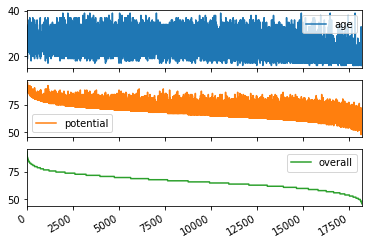

In [22]:
df_19.loc[:,['age','potential', 'overall']].plot(subplots=True);

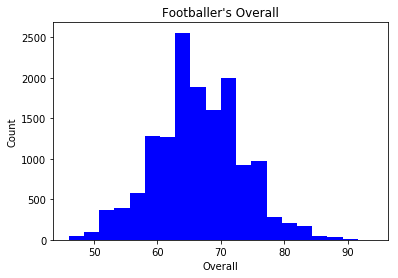

In [14]:
plt.hist(df_19.overall, bins=20, alpha=1, color='b')
plt.title("Footballer's Overall" )
plt.xlabel('Overall')
plt.ylabel('Count');

In [23]:
overall_mean = df_19.overall.mean()
overall_std = df_19.overall.std()
print('The mean for the Overall is',overall_mean, 'and the standard deviation is', overall_std )

The mean for the Overall is 66.38180831581089 and the standard deviation is 6.889961125101241


In [24]:
print(' percent of footballers values lower that €30M:', df_19[df_19.value <= 30000000].value.count() 
      / df_19.value.count() * 100)

 percent of footballers values lower that €30M: 99.16570575866514


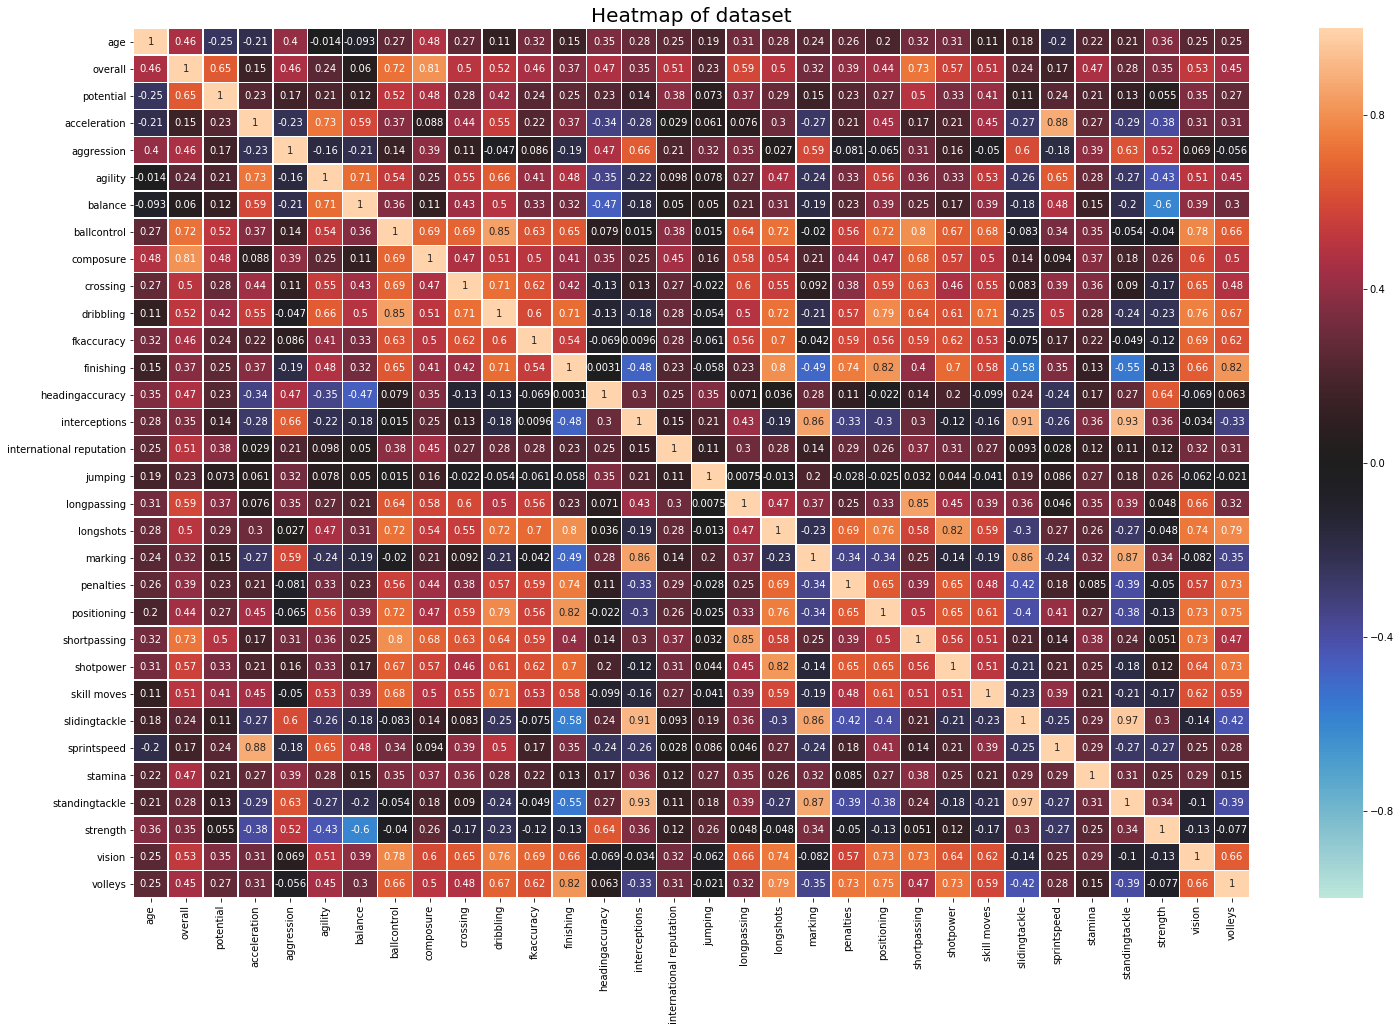

In [90]:
plt.rcParams['figure.figsize']=(25,16)
hm=sns.heatmap(df_19[['age', 'overall', 'potential', 'value', 'wage',
                'acceleration', 'aggression', 'agility', 'balance', 'ballcontrol', 
                'body type','composure', 'crossing','dribbling', 'fkaccuracy', 'finishing', 
                'headingaccuracy', 'interceptions','international reputation',
                'joined', 'jumping', 'longpassing', 'longshots',
                'marking', 'penalties', 'position', 'positioning',
                'shortpassing', 'shotpower', 'skill moves', 'slidingtackle',
                'sprintspeed', 'stamina', 'standingtackle', 'strength', 'vision',
                'volleys','release clause']].corr(), vmin=-1, vmax=1, annot = True, linewidths=.5, cmap='icefire')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;

# i see some correaltion that make sense, like potential and overall have a decent corr. 
# balance and strength have the most negative correlation. Not sure why
# international rep is highly correlated with composure... very interesting. I would of thought something like age and overall would be the highest. 

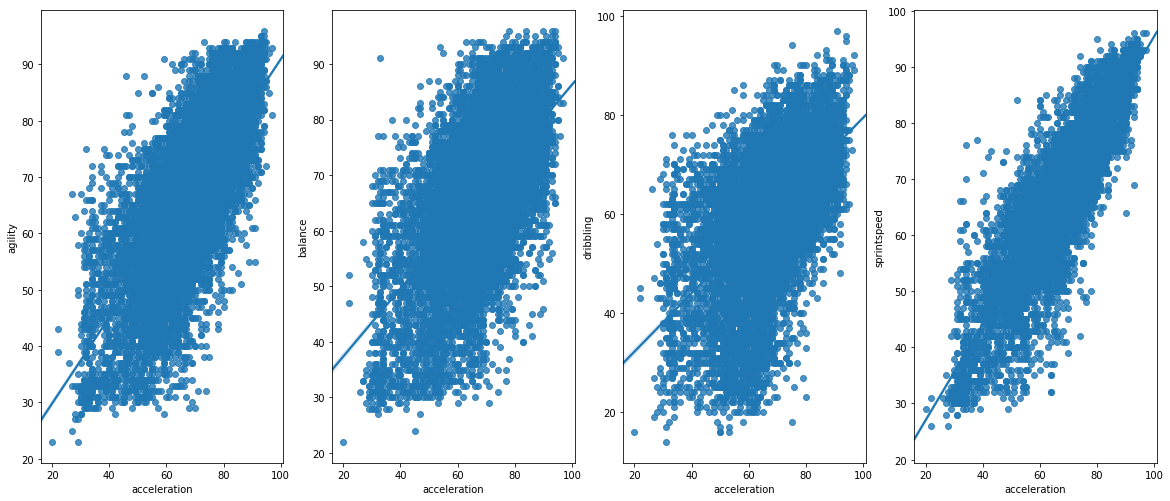

In [65]:
def make_scatter(df):
    feats = ('agility', 'balance', 'dribbling', 'sprintspeed')
    
    for index, feat in enumerate(feats):
        plt.subplot(len(feats)/4+1, 4, index+1,alpha=6.9)
        ax = sns.regplot(x = 'acceleration', y = feat, data = df)

plt.figure(figsize = (20, 20))
plt.subplots_adjust(hspace = 0.4)

make_scatter(df_19)

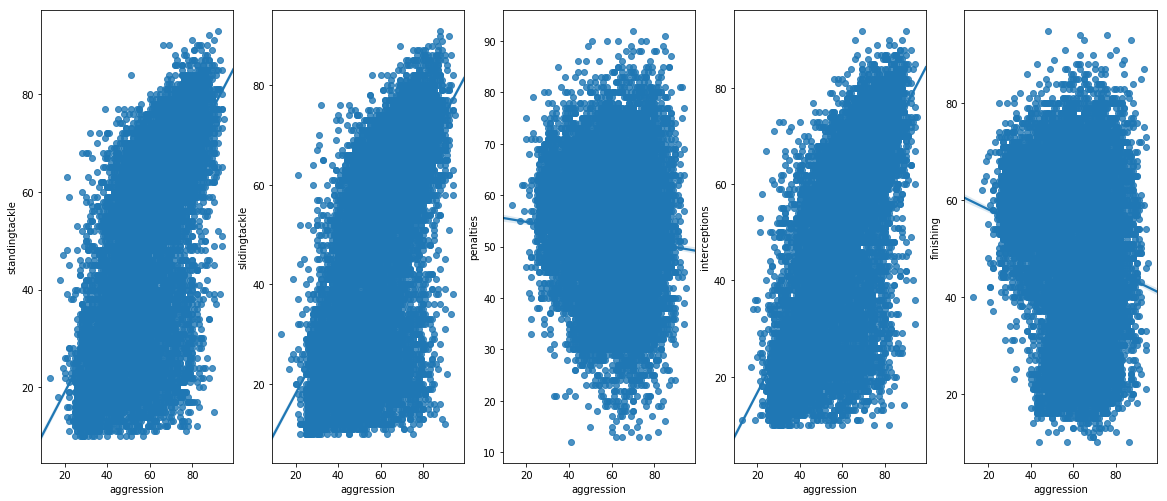

In [66]:
def aggression(df):
    feats = ('standingtackle', 'slidingtackle', 'penalties', 'interceptions', 'finishing')
    
    for index, feat in enumerate(feats):
        plt.subplot(len(feats)/5+1, 5, index+1,alpha=1.9)
        ax = sns.regplot(x = 'aggression', y = feat, data = df)

plt.figure(figsize = (20, 20))
plt.subplots_adjust(hspace = 0.4)

aggression(df_19)

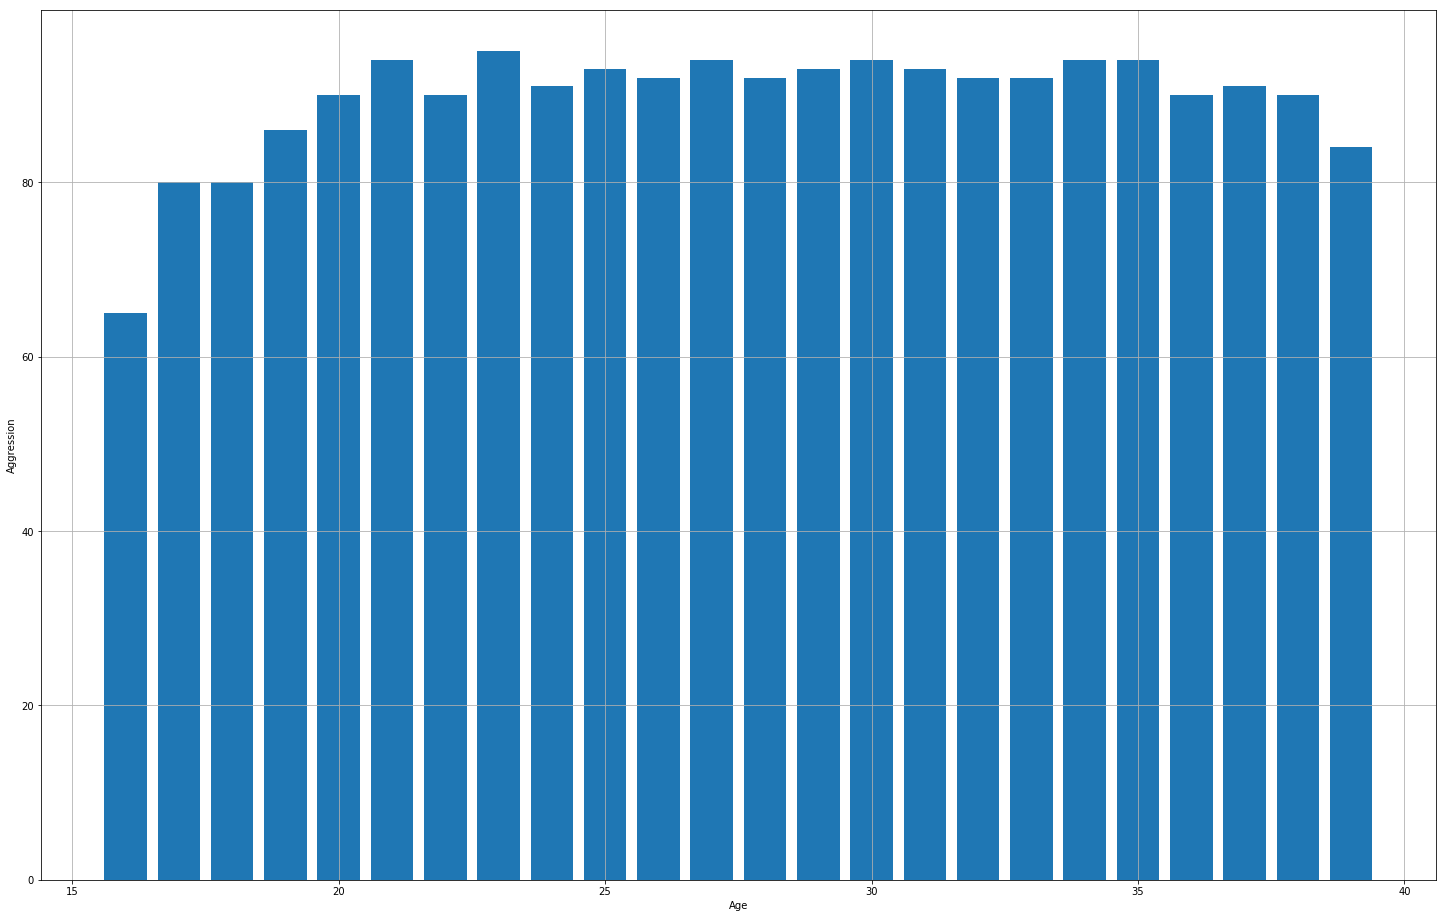

In [69]:
# Does age play a role of how aggresive you are? Nope... that shit is born within!!!
plt.bar(df_19['age'], df_19['aggression'])
plt.xlabel('Age')
plt.ylabel('Aggression')
plt.grid()

In [38]:
#160 out of 195 nations are represented in fifa. 
#df.groupby(by='nationality').groups.keys()

fifa_list = [each for each in df.groupby(by='nationality').groups.keys()]

fifa_list

In [40]:
countries = ['Afghanistan','Aland Islands','Albania','Algeria','American Samoa','Andorra','Angola',
    'Anguilla','Antarctica','Antigua & Barbuda','Argentina','Armenia','Aruba','Australia','Austria',
'Azerbaijan','Bahamas','Bahrain','Bangladesh','Barbados','Belarus','Belgium','Belize','Benin',
'Bermuda','Bhutan','Bolivia','Bonaire','Bosnia Herzegovina','Botswana','Bouvet Island','Brazil','British Indian Ocean Territory',
'Brunei Darussalam','Bulgaria','Burkina Faso','Burundi','Cambodia','Cameroon','Canada','Cape Verde',
'Cayman Islands','Central African Rep.','Chad','Chile','China PR','Christmas Island','Cocos Islands',
'Colombia','Comoros','DR Congo','Cook Islands','Costa Rica','Ivory Coast','Croatia','Cuba','Curacao','Cyprus','Czech Republic',
'Denmark','Djibouti','Dominica','Dominican Republic','Ecuador','Egypt','El Salvador','Equatorial Guinea',
'Eritrea','Estonia','Ethiopia','Falkland Islands','Faroe Islands','Fiji','Finland','France','French Guiana','French Polynesia','French Southern Territories',
'Gabon','Gambia','Georgia','Germany','Ghana','Gibraltar','Greece','Greenland','Grenada','Guadeloupe',
'Guam','Guatemala','Guernsey','Guinea','Guinea-Bissau','Guyana','Haiti','Honduras','Hong Kong',
'Hungary','Iceland','India','Indonesia','Iran','Iraq','Ireland','Isle of Man','Israel','Italy',
'Jamaica','Japan','Jordan','Kazakhstan','Kenya','Kiribati',"Korea DPR",'Korea Republic','Kuwait',
'Kyrgyzstan',"Laos",'Latvia','Lebanon','Lesotho','Liberia','Libya','Liechtenstein','Lithuania',
'Luxembourg','Macao','FYR Macedonia','Madagascar','Malawi','Malaysia','Maldives','Mali','Malta',
'Marshall Islands','Martinique','Mauritania','Mauritius','Mayotte','Mexico','Micronesia','Moldova'
'Monaco','Mongolia','Montenegro','Montserrat','Morocco','Mozambique','Myanmar','Namibia','Nauru',
'Nepal','Netherlands','New Caledonia','New Zealand','Nicaragua','Niger','Nigeria','Niue','Norfolk Island',
'Northern Mariana Islands','Norway','Oman','Pakistan','Palau','Palestine',
'Panama','Papua New Guinea','Paraguay','Peru','Philippines','Pitcairn','Poland','Portugal','Puerto Rico',
'Qatar','Reunion','Romania','Russia','Rwanda','Saint Barthelemy','Saint Helena, Ascension and Tristan da Cunha',
'Saint Kitts and Nevis','Saint Lucia','Saint Martin','Saint Pierre and Miquelon','Saint Vincent and the Grenadines','Samoa',
'San Marino','Sao Tome and Principe','Saudi Arabia','Senegal','Serbia','Seychelles','Sierra Leone',
'Singapore','Slovakia','Slovenia','Solomon Islands','Somalia','South Africa','South Georgia and the South Sandwich Islands',
'South Sudan','Spain','Sri Lanka','Sudan','Suriname','Svalbard and Jan Mayen','Swaziland','Sweden',
'Switzerland','Syria','Taiwan','Tajikistan','Tanzania','Thailand','Timor-Leste','Togo','Tokelau','Tonga','Trinidad and Tobago','Tunisia','Turkey',
'Turkmenistan','Turks and Caicos Islands','Tuvalu','Uganda','Ukraine','United Arab Emirates','United Kingdom',
'United States','Uruguay','Uzbekistan','Vanuatu','Venezuela','Vietnam','Virgin Islands, British','Virgin Islands, U.S.',
'Wallis and Futuna','Western Sahara','Yemen','Zambia','Zimbabwe']

In [41]:
# what countries are left out of fifa 19
left_out = list(set(countries).difference(fifa_list))

left_out.sort()
left_out
#Fifa breaks up the UK as individual soverignty to show the players distinct nationality. Interesting 
#to me because i feel they secretly considered the politics of brexit and the scottish wanting independence.  

In [255]:
# !pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [256]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [259]:
@interact 
def return_cnts(column='nationality',x=(0,1500,25)):
    return plt.plot(df_19[column].value_counts())

interactive(children=(Text(value='nationality', description='column'), IntSlider(value=750, description='x', m…

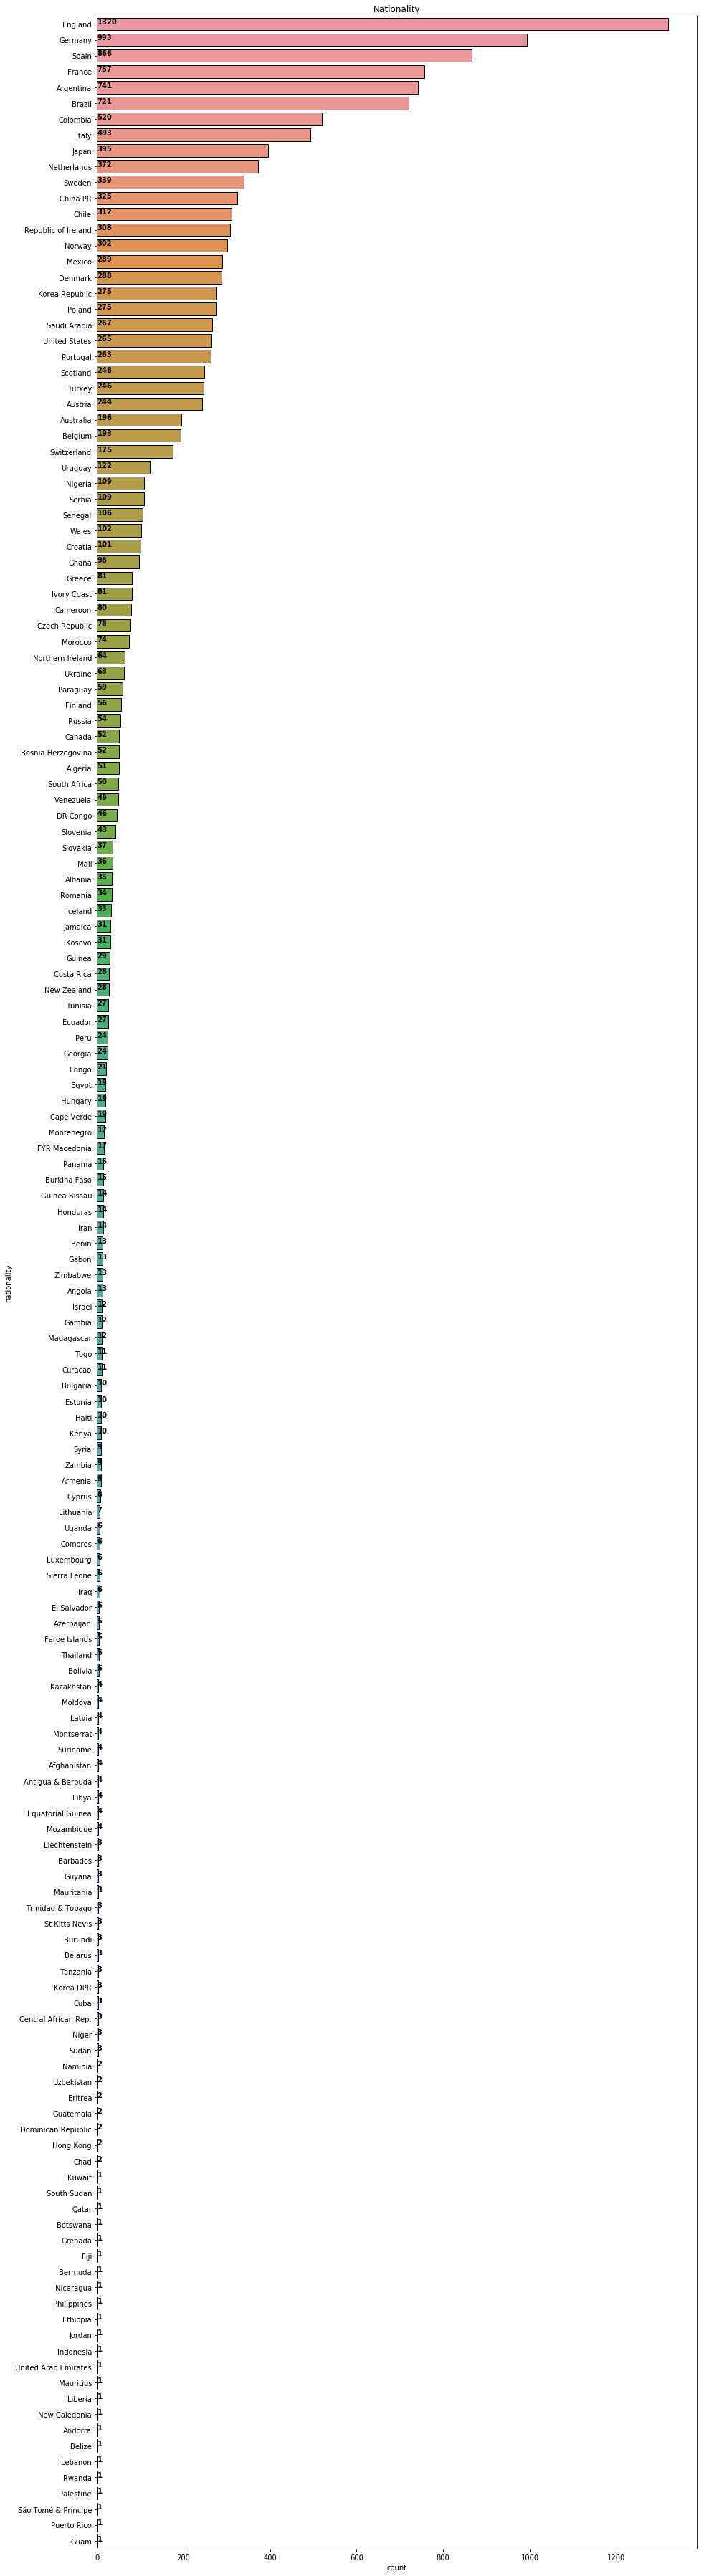

In [28]:
# player count by nationality

#need to figure out how just get the top 20 and bottom top
plt.figure(figsize=(15,65))

ax= sns.countplot(y = df_19['nationality'],
                 order = df_19['nationality'].value_counts().index,
                 linewidth = 1, edgecolor= 'k'*df_19['nationality'].nunique())
for i,j in enumerate(df_19['nationality'].value_counts().values):
    ax.text(.7,i,j,weight='bold')
plt.title('Nationality')
plt.show()

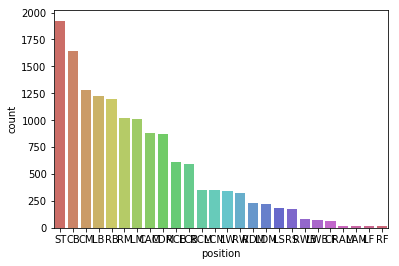

In [29]:
#players by pos i want to add numbers into the bars 
ax = sns.countplot(x=df_19['position'], 
                   order= df_19['position'].value_counts().index,
                   palette='hls', linewidth=1)

In [31]:
che.position.value_counts(normalize=False).index

Index(['ST', 'CB', 'LM', 'RM', 'LB', 'RB', 'CDM', 'CAM', 'CM', 'RCB', 'LCB',
       'LW', 'RW', 'LCM', 'LDM', 'RCM', 'LS', 'RDM', 'RS', 'LF', 'LWB', 'RF',
       'RWB'],
      dtype='object')

In [32]:
che.position.value_counts(normalize=False).values

array([108,  92,  55,  54,  54,  47,  43,  42,  40,  33,  30,  25,  25,
        22,  16,  16,  12,   9,   9,   3,   3,   2,   1])

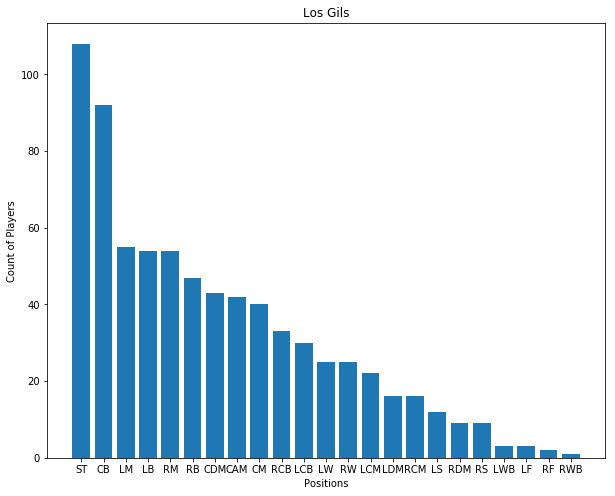

In [263]:
che = df_19[df_19['nationality'] == 'Argentina']
plt.figure(figsize=(10,8))
plt.bar(che.position.value_counts(normalize=False).index, che.position.value_counts(normalize=False).values)
plt.xlabel('Positions')
plt.ylabel('Count of Players')
plt.title('Los Gils');

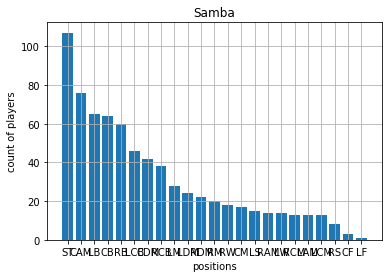

In [33]:
samba = df_19[df_19['nationality'] == 'Brazil']
plt.grid()
plt.bar(samba.position.value_counts(normalize=False).index, samba.position.value_counts(normalize=False).values)
plt.xlabel('positions')
plt.ylabel('count of players')
plt.title('Samba');

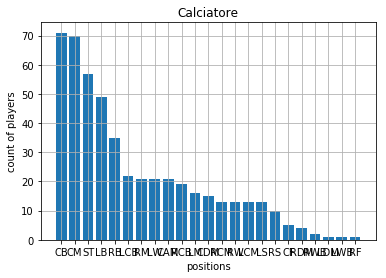

In [34]:
pasta = df_19[df_19['nationality'] == 'Italy']
plt.figure()
plt.grid()
plt.bar(pasta.position.value_counts(normalize=False).index, pasta.position.value_counts(normalize=False).values)
plt.xlabel('positions')
plt.ylabel('count of players')
plt.title('Calciatore');

In [ ]:
# what position is produced the most by each nation??

In [92]:
df_19[df_19['preferred foot'] == 'Right'][['name','overall']].head()

name  overall
1  Cristiano Ronaldo       94
2          Neymar Jr       92
4       K. De Bruyne       91
5          E. Hazard       91
6          L. Modrić       91

In [93]:
df_19[df_19['preferred foot'] == 'Left'][['name','overall']].head()

name  overall
0       L. Messi       94
13   David Silva       90
15     P. Dybala       89
17  A. Griezmann       89
24  G. Chiellini       89

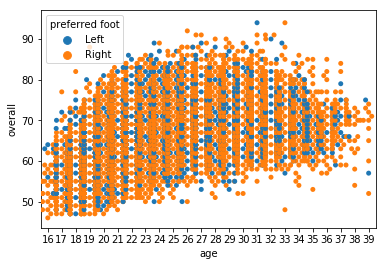

In [184]:
sns.violinplot(x='age', y='overall', data=df_19, hue='preferred foot')

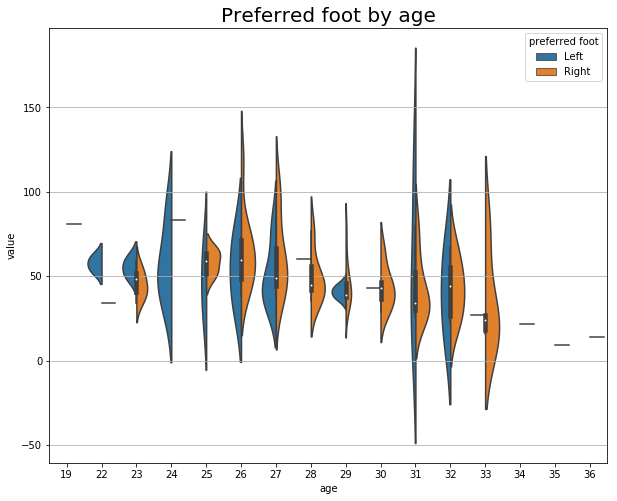

In [392]:
plt.figure(figsize=(10,8))
p = sns.violinplot(x=df_19['age'][0:100], y=df_19['value'][0:100]/1000000, hue=df_19['preferred foot'], split=True)

plt.xticks(rotation=0)
plt.grid(axis='y')
plt.title('Preferred foot by age', fontsize=20)
plt.show()


fig = p.get_figure()
fig.savefig('Preferred foot by Age', pad_inches=.25)

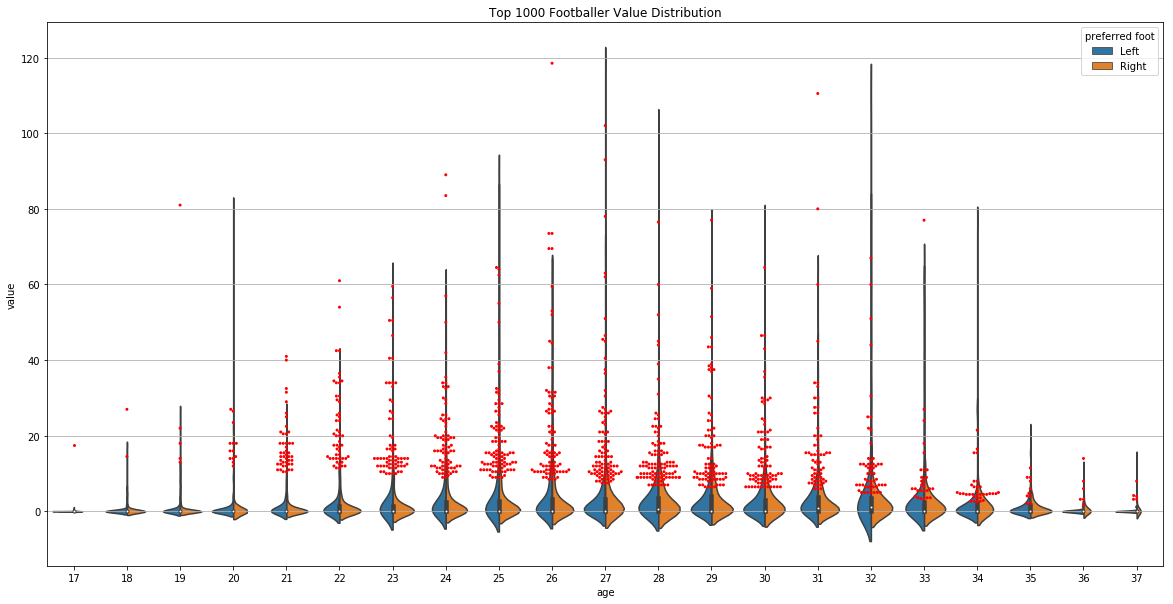

In [389]:
plt.figure(figsize=(20,10))
plt.title('Top 1000 Footballer Value Distribution')
plt.xlabel('Players Age')
plt.ylabel('Player Value in Euros')
g = sns.violinplot(x=df_19['age'], y=df_19['value']/1000000, hue=df_19['preferred foot'], split=True)
sns.swarmplot(x=(df_19['age'][0:1000]), y=(df_19['value']/1000000)[0:1000], color="r", size=3, data=df_19, ax=g)



plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


fig = g.get_figure()
fig.savefig('top 1000 footballers Value Distribution', pad_inches=.25);

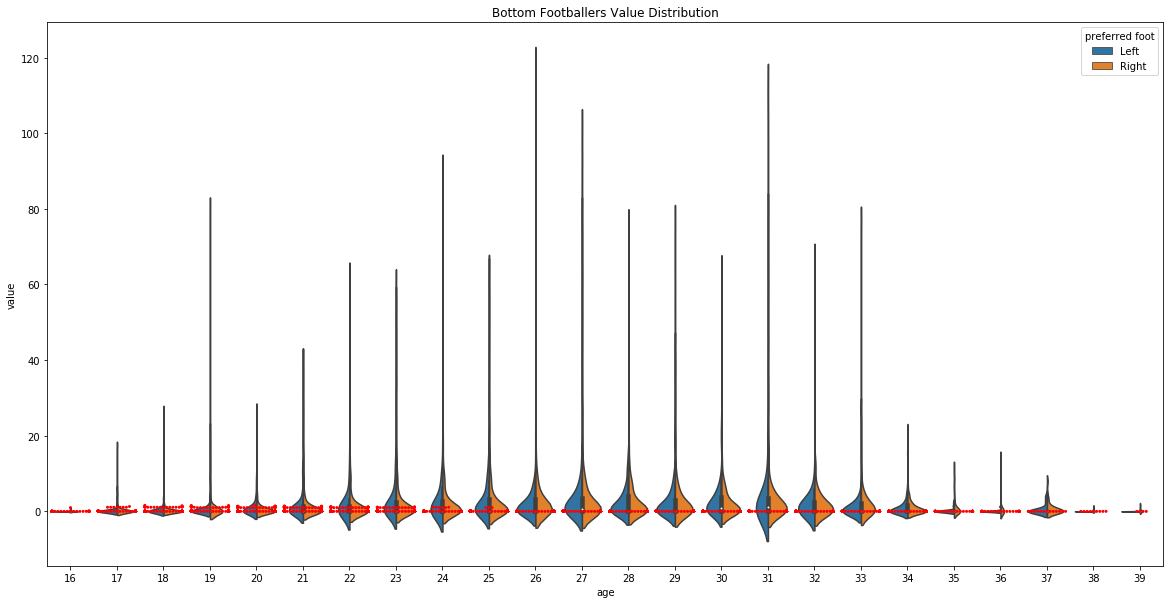

In [251]:
plt.figure(figsize=(20,10))
plt.title('Bottom Footballers Value Distribution')
g = sns.violinplot(x=df_19['age'], y=df_19['value']/1000000, hue=df_19['preferred foot'], split=True)
sns.swarmplot(x=(df_19['age'][7000:]), y=(df_19['value']/1000000)[7000:], color="r", size=3, data=df_19, ax=g);

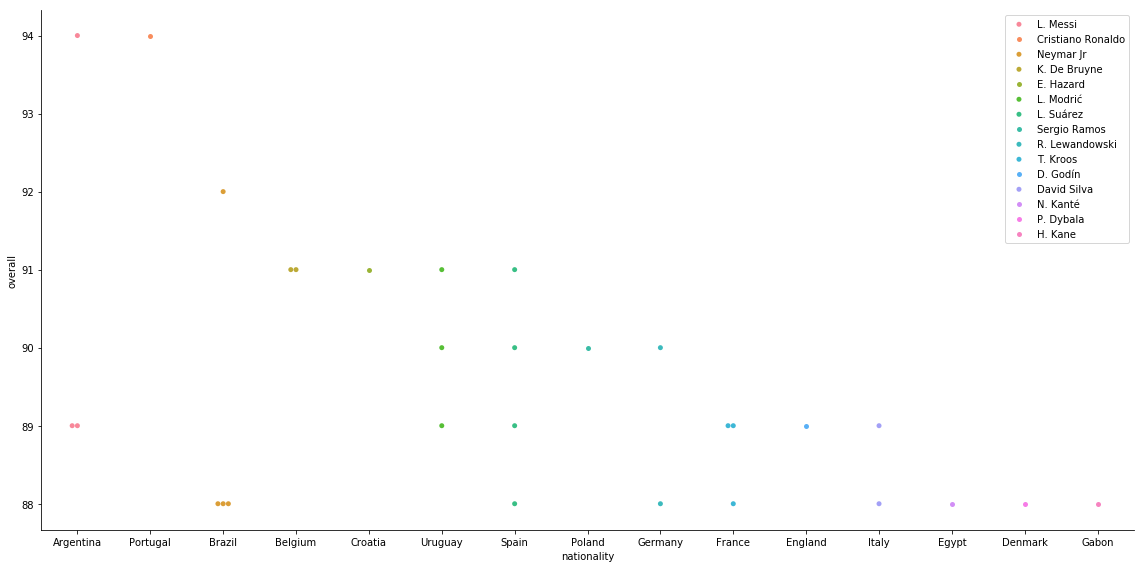

In [555]:
sns.catplot(x='nationality', y='overall', data=df_19[df_19['overall'] > 85][0:500], kind='swarm', 
            height=8,margin_titles=True, aspect=2)
plt.legend(df_19['name']);

In [383]:
df_19.shape

(14743, 100)

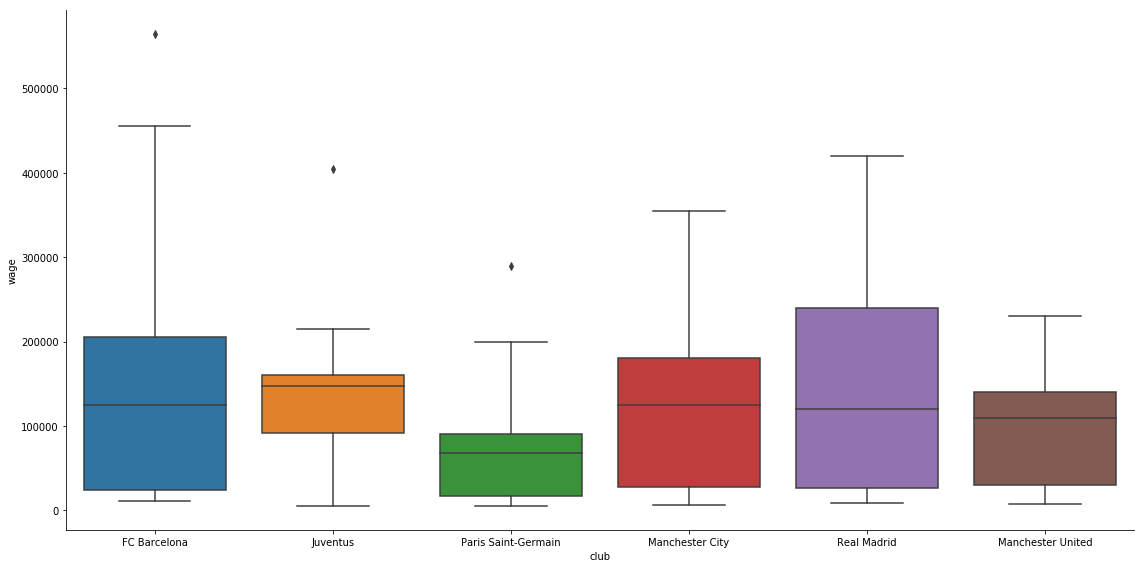

In [382]:
# clubs = ['FC Barcelona', 'Real Madrid', 'Juventus', 'Paris Saint-Germain','Manchester United', 'Manchester City']
# df_19[df_19['club'].isin(clubs)]
sns.catplot(x='club', y='wage', data=df_19[df_19['club'].isin(clubs)], kind='box', 
            height=8,margin_titles=True, aspect=2)


In [381]:
clubs = ['FC Barcelona', 'Real Madrid', 'Juventus', 'Paris Saint-Germain','Manchester United', 'Manchester City']
df_19[df_19['club'].isin(clubs)]

id                name  age         nationality  overall  \
0      158023            L. Messi   31           Argentina       94   
1       20801   Cristiano Ronaldo   33            Portugal       94   
2      190871           Neymar Jr   26              Brazil       92   
4      192985        K. De Bruyne   27             Belgium       91   
6      177003           L. Modrić   32             Croatia       91   
7      176580           L. Suárez   31             Uruguay       91   
8      155862        Sergio Ramos   32               Spain       91   
11     182521            T. Kroos   28             Germany       90   
13     168542         David Silva   32               Spain       90   
15     211110           P. Dybala   24           Argentina       89   
20     189511     Sergio Busquets   29               Spain       89   
21     179813           E. Cavani   31             Uruguay       89   
23     153079           S. Agüero   30           Argentina       89   
24     138956        G. Chiellini   33               Italy       89   
25     231747           K. Mbappé   19              France       88   
27     200145            Casemiro   26              Brazil       88   
30     197781                Isco   26               Spain       88   
32     189242            Coutinho   26              Brazil       88   
35     176676             Marcelo   30              Brazil       88   
36     173731             G. Bale   28               Wales       88   
39     164240        Thiago Silva   33              Brazil       88   
42     205600           S. Umtiti   24              France       87   
45     195864            P. Pogba   25              France       87   
47     192505           R. Lukaku   25             Belgium       87   
49     189332          Jordi Alba   29               Spain       87   
53     168651          I. Rakitić   30             Croatia       87   
54     152729               Piqué   31               Spain       87   
55     222492             L. Sané   22             Germany       86   
56     218667      Bernardo Silva   23            Portugal       86   
60     202652         R. Sterling   23             England       86   
62     201535           R. Varane   25              France       86   
63     199556         M. Verratti   25               Italy       86   
64     191043         Alex Sandro   27              Brazil       86   
65     190483       Douglas Costa   27              Brazil       86   
70     184344          L. Bonucci   31               Italy       86   
72     180206           M. Pjanić   28  Bosnia Herzegovina       86   
73     177509          M. Benatia   31             Morocco       86   
75     135507         Fernandinho   33              Brazil       86   
79     220834       Marco Asensio   22               Spain       85   
84     204485           R. Mahrez   27             Algeria       85   
89     192366         N. Otamendi   30           Argentina       85   
93     184941          A. Sánchez   29               Chile       85   
96     181872            A. Vidal   31               Chile       85   
99     179846          S. Khedira   31             Germany       85   
103    170890          B. Matuidi   31              France       85   
105    165153          K. Benzema   30              France       85   
107    139720          V. Kompany   32             Belgium       85   
113    212218          A. Laporte   24              France       84   
116    211300          A. Martial   22              France       84   
119    207865          Marquinhos   24              Brazil       84   
...       ...                 ...  ...                 ...      ...   
1524   232411           C. Nkunku   20              France       76   
2513   239053         F. Valverde   19             Uruguay       74   
2903   237692            P. Foden   18             England       73   
3118   208088        Sergi Samper   23               Spain       73   
3418   236610             M. Kean  

In [380]:
df_19['club'].unique()

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester City', 'Chelsea', 'Real Madrid', 'FC Bayern München',
       'Atlético Madrid', 'Tottenham Hotspur', 'Liverpool', 'Napoli',
       'Arsenal', 'Inter', 'Manchester United', 'Lazio',
       'Borussia Dortmund', 'Vissel Kobe', 'Olympique Lyonnais', 'Roma',
       'Valencia CF', 'FC Porto', 'FC Schalke 04', 'Beşiktaş JK',
       'LA Galaxy', 'Sporting CP', 'Real Betis', 'Olympique de Marseille',
       'RC Celta', 'Real Sociedad', 'Sevilla FC', 'SL Benfica',
       'AS Monaco', 'Atalanta', 'Grêmio', 'Atlético Mineiro',
       'Bayer 04 Leverkusen', 'RB Leipzig', 'Ajax', 'Dalian YiFang FC',
       'Villarreal CF', 'Milan', 'West Ham United', 'Everton',
       'Shanghai SIPG FC', 'OGC Nice', 'Al Nassr', 'Cruzeiro',
       'TSG 1899 Hoffenheim', 'Athletic Club de Bilbao', 'Leicester City',
       'Torino', 'Medipol Başakşehir FK', 'Beijing Sinobo Guoan FC',
       'Crystal Palace', 'PFC CSKA Moscow', 'Shakhtar Donets

In [25]:
df_19.iloc[df_19.groupby(df_19['position'])['overall'].idxmax()][['name', 'position', 'club']].set_index('name')

position                 club
name                                           
E. Cavani               LS  Paris Saint-Germain
N. Kanté               LDM              Chelsea
K. Mbappé               RM  Paris Saint-Germain
Laure Santeiro         CAM           Fluminense
Marco Asensio           RW          Real Madrid
F. Balbuena            RCB      West Ham United
P. Pogba               RDM    Manchester United
Isco                    LW          Real Madrid
David Silva            LCM      Manchester City
H. Kane                 ST    Tottenham Hotspur
L. Modrić              RCM          Real Madrid
M. Icardi               ST                Inter
M. Salah                RM            Liverpool
Neymar Jr               LW  Paris Saint-Germain
David Neres             RW                 Ajax
A. Gómez                LS             Atalanta
J. Kimmich             RCM    FC Bayern München
R. Lewandowski          ST    FC Bayern München
E. Hazard               LF              Chelsea
Bernardo Silva          RW      Manchester City
L. Messi                RF         FC Barcelona
C. Eriksen             CAM    Tottenham Hotspur
Sergio Ramos           RCB          Real Madrid
M. Reus                 LM    Borussia Dortmund
D. Criscito            LCB                Genoa
Cristiano Ronaldo       ST             Juventus

In [570]:
df_19[df_19['position'] == 'CAM'] 

id                 name  age          nationality  overall  \
17     194765         A. Griezmann   27               France       89   
31     190460           C. Eriksen   26              Denmark       88   
61     201942      Roberto Firmino   26               Brazil       86   
66     189596            T. Müller   28              Germany       86   
74     176635              M. Özil   29              Germany       86   
80     216594             N. Fekir   24               France       85   
96     181872             A. Vidal   31                Chile       85   
101    178518        R. Nainggolan   30              Belgium       85   
144    177388             D. Payet   31               France       84   
208    184942             Giuliano   28               Brazil       83   
254    207494           J. Lingard   25              England       82   
263    201400              Rafinha   25               Brazil       82   
282    191180           J. Pastore   29            Argentina       82   
289    186561            A. Ramsey   27                Wales       82   
292    184484        G. Sigurðsson   28              Iceland       82   
295    184144            N. Gaitán   30            Argentina       82   
302    181291         G. Wijnaldum   27          Netherlands       82   
320    230271       Laure Santeiro   30               Brazil       81   
325    226456        Pablo Fornals   22                Spain       81   
337    212814           João Mário   25             Portugal       81   
360    200647            J. Iličić   30             Slovenia       81   
370    193348           X. Shaqiri   26          Switzerland       81   
379    189358            S. Kagawa   29                Japan       81   
380    188988           M. Lanzini   25            Argentina       81   
402    161956         Borja Valero   33                Spain       81   
413    235790           K. Havertz   19              Germany       80   
418    230977           M. Almirón   24             Paraguay       80   
421    230142            Oyarzabal   21                Spain       80   
449    208128        H. Çalhanoğlu   24               Turkey       80   
489    193886            D. Didavi   28              Germany       80   
501    189575              Muniain   25                Spain       80   
507    188388         R. Boudebouz   28              Algeria       80   
525    176104             V. Birsa   31             Slovenia       80   
530    171579          Raúl García   31                Spain       80   
577    225663           A. Golovin   22               Russia       79   
585    220018             A. Rebić   24              Croatia       79   
603    210324           J. Hofmann   25              Germany       79   
632    201508           G. Ramírez   27              Uruguay       79   
639    200155           H. Vanaken   25              Belgium       79   
643    199439       M. Gregoritsch   24              Austria       79   
646    199189           R. Barkley   24              England       79   
656    193738          Y. Belhanda   28              Morocco       79   
711    161648          H. Ben Arfa   31               France       79   
713    159065           E. Lavezzi   33            Argentina       79   
715    158133            J. Farfán   33                 Peru       79   
736    230988        F. Krovinović   22              Croatia       78   
739    230269      Claudio Coíntra   34               Brazil       78   
743    229406          João Novais   24             Portugal       78   
750    226377          G. Martínez   25            Argentina       78   
753    225309             N. Amiri   21              Germany       78   
...       ...                  ...  ...                  ...      ...   
17201  246195            C. Elliot   18          New Zealand       55   
17203  244916            A. Zaizen   19                Japan       55   
17256  242151            T. Jäntti   18              Finland       55


### Create the DNA column

In [39]:
len(df_19.columns.sort_values(ascending=False))

97

In [46]:
#Get dummies
# dummy = pd.get_dummies(df_19['body type'], sparse=False, dtype=int)
# dummy.head()

df_19= pd.concat([df_19,pd.get_dummies(df_19['body type'],sparse=False,dtype=int)],axis=1).drop(['body type'], axis=1)


#dummied work rate and dropped original column
df_19= pd.concat([df_19,pd.get_dummies(df_19['work rate'],dtype=int)],axis=1).drop(['work rate'], axis=1)

#df = pd.concat([df,pd.get_dummies(df['mycol'], prefix='mycol',dummy_na=True)],axis=1).drop(['mycol'],axis=1)

In [33]:
### get dummies for bodytype and work rate

df_19['physical']= df_19['acceleration'] + df_19['agility'] + df_19['balance'] + df_19['jumping'] \
+ df_19['reactions'] + df_19['sprintspeed'] + df_19['stamina'] + df_19['strength'] + df_19['Lean'] \
+ df_19['Normal'] + df_19['Stocky'] + df_19['height'] + df_19['weight'] + df_19['High/ High'] + df_19['High/ Low'] \
+ df_19['Medium/ Low'] + df_19['Medium/ Medium']+ df_19['High/ Medium'] + df_19['Low/ High'] + df_19['Low/ Low']\
+ df_19['Low/ Medium'] + df_19['Medium/ High'] - df_19['age']

# plt.bar(df_19['name'][0:16], df_19['physical'].sort_values(ascending=False)[0:16]);

#df_19.dtypes.sort_values(ascending=True)


In [49]:
df_19['skills']= df_19['ballcontrol'] + df_19['crossing'] + df_19['curve'] + \
df_19['dribbling'] + df_19['finishing'] + df_19['fkaccuracy'] + df_19['headingaccuracy'] + \
df_19['longpassing'] + df_19['longshots'] + df_19['shortpassing'] + df_19['shotpower'] + df_19['skill moves'] + \
df_19['slidingtackle'] + df_19['standingtackle'] + df_19['volleys']  +  df_19['weak foot']


#plt.bar(df_19['name'][0:10],df_19['skills'].sort_values(ascending=False)[0:10])

In [ ]:
plt.scatter(df_19['skills'].sort_values(ascending=True)[0:10],df_19['name'].sort_values(ascending=False)[0:10])

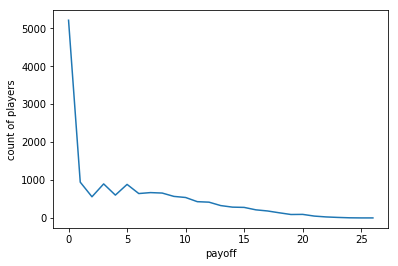

In [34]:
#Engineered 
df_19['payoff'] = df_19['potential']-df_19['overall'] 
plt.plot(df_19.groupby(by='payoff').size())
plt.ylabel('count of players')
plt.xlabel('payoff');

In [40]:
df_19['mental'] = df_19['aggression'] + df_19['composure'] + df_19['interceptions'] + df_19['marking'] \
+ df_19['payoff'] + df_19['positioning'] + df_19['reactions'] + df_19['international reputation'] + df_19['penalties'] \
+ df_19['vision']

#plt.bar(df_19['mental'].sort_values(ascending=False)[0:10], df_19['name'].sort_values(ascending=False)[0:10])

In [41]:
df_19.head()

id               name  age nationality  overall  potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
4  192985       K. De Bruyne   27     Belgium       91         92   
5  183277          E. Hazard   27     Belgium       91         91   

                  club      value    wage  special preferred foot  \
0         FC Barcelona  110500000  565000     2202           Left   
1             Juventus   77000000  405000     2228          Right   
2  Paris Saint-Germain  118500000  290000     2143          Right   
4      Manchester City  102000000  355000     2281          Right   
5              Chelsea   93000000  340000     2142          Right   

   international reputation  weak foot  skill moves position  jersey number  \
0                       5.0        4.0          4.0       RF           10.0   
1                       5.0        4.0          5.0       ST            7.0   
2                       5.0        5.0          5.0       LW           10.0   
4                       4.0        5.0          4.0      RCM            7.0   
5                       4.0        4.0          4.0       LF           10.0   

         joined loaned from contract valid until  height  weight    ls    st  \
0   Jul 1, 2004         N/A                 2021      67     159  88+2  88+2   
1  Jul 10, 2018         N/A                 2022      74     183  91+3  91+3   
2   Aug 3, 2017         N/A                 2022      69     150  84+3  84+3   
4  Aug 30, 2015         N/A                 2023      71     154  82+3  82+3   
5   Jul 1, 2012         N/A                 2020      68     163  83+3  83+3   

     rs    lw    lf    cf    rf    rw   lam   cam   ram    lm   lcm    cm  \
0  88+2  92+2  93+2  93+2  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2   
1  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3   
2  84+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  88+3  81+3  81+3   
4  82+3  87+3  87+3  87+3  87+3  87+3  88+3  88+3  88+3  88+3  87+3  87+3   
5  83+3  89+3  88+3  88+3  88+3  89+3  89+3  89+3  89+3  89+3  82+3  82+3   

    rcm    rm   lwb   ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb  \
0  84+2  91+2  64+2  61+2  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2   
1  81+3  88+3  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3   
2  81+3  88+3  65+3  60+3  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3   
4  87+3  88+3  77+3  77+3  77+3  77+3  77+3  73+3  66+3  66+3  66+3  73+3   
5  82+3  89+3  66+3  63+3  63+3  63+3  66+3  60+3  49+3  49+3  49+3  60+3   

   crossing  finishing  headingaccuracy  shortpassing  volleys  dribbling  \
0      84.0         95             70.0          90.0     86.0       97.0   
1      84.0         94             89.0          81.0     87.0       88.0   
2      79.0         87             62.0          84.0     84.0       96.0   
4      93.0         82             55.0          92.0     82.0       86.0   
5      81.0         84             61.0          89.0     80.0       95.0   

   curve  fkaccuracy  longpassing  ballcontrol  acceleration  sprintspeed  \
0   93.0        94.0         87.0         96.0            91           86   
1   81.0        76.0         77.0         94.0            89           91   
2   88.0        87.0         78.0         95.0            94           90   
4   85.0        83.0         91.0         91.0            78           76   
5   83.0        79.0         83.0         94.0            94           88   

   agility  reactions  balance  shotpower  jumping  stamina  strength  \
0       91         95       95       85.0       68       72        59   
1       87         96       70       95.0       95       88        79   
2       96         94       84       80.0       61       81        49   
4       79         91       77       91.0       63       90        75   
5   

### explore hieght and wieght by postions.

In [ ]:
#sns.swarmplot(df_19['height'],df_19['value']/1000000, data=df_19[df_19['position'] == 'ST']);

In [586]:
# sns.swarmplot(df_19['age'],df_19['payoff']);

In [ ]:
# sns.scatterplot(df_19['height'],df_19['value']/100000, data=df_19[df_19['position'] == 'ST']);

In [ ]:
# sns.scatterplot(df_19['weight'],df_19['value']/1000000, data=df_19[df_19['position'] == 'ST'],legend='full');

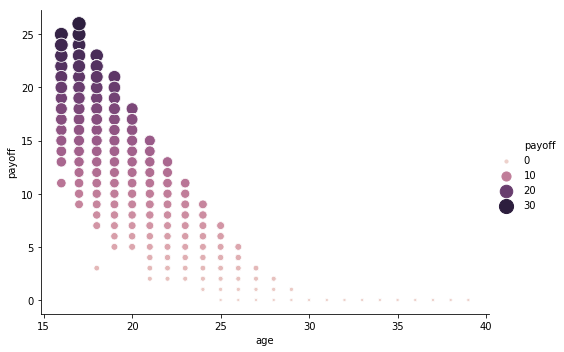

In [29]:
# sns.lmplot(x='age', y='payoff', hue="payoff",
#            col='payoff', row='age', data=df_19);

sns.relplot(x="age", y="payoff", size="payoff", sizes=(10, 200), data=df_19, aspect=1.4, hue='payoff');

### Random forest regressor

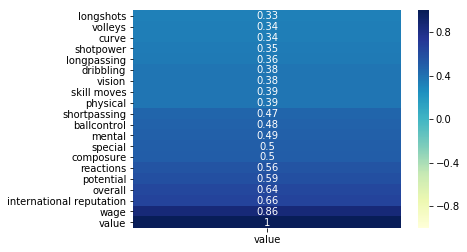

In [42]:
sns.heatmap(df_19.corr()[['value']].sort_values('value',ascending=True).tail(20),
            vmax=1, vmin=-1, cmap='YlGnBu', annot=True);

I know i have a multicolinearity issues bc of the'genes' i created. Its evidined in in lr model, its also predicting the best. 
I have to see which which coeffs ridge and lasso are using to see what coefs were dropped. 
I think i may have to feature engineer the test set as well. I foudn that 4 of my engineered features were pulled. I believe it was bc of multicolinearity. 

In [50]:
#remeber to rerun the lower case list comprehension at the beginning. 
features = df_19[['potential','reactions','ballcontrol', 'international reputation','composure',
                  'overall', 'special','skill moves','dribbling','skills','physical','mental','lean','normal', 'stocky', 
                  'high/ high', 'high/ low', 'high/ medium','shortpassing', 'vision','weight','height',
                  'low/ high', 'low/ low', 'low/ medium', 'medium/ high', 'medium/ low', 'medium/ medium', 
                 'physical','payoff', 'mental']]
features = features.astype(int)

X= features
y=df_19['value']

In [51]:
X_train,X_val,y_train,y_val = train_test_split(X, y, test_size=.33,
                                                random_state=42)
print (len(X_val))
print (len(y_val))

4866
4866


In [52]:
#Both methods are about the same, with the ET being a bit worse when there is a high number of noisy features 
#(in high dimensional data-sets).
#That said, provided the (perhaps manual) feature selection is near optimal, the performance is about the same, 
#however, ET's can be computationally faster.

rf= RandomForestRegressor()
et= ExtraTreesRegressor()

In [53]:
cross_val_score(rf,X_train,y_train,cv=5).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

0.9610224295951252

In [54]:
cross_val_score(et, X_train,y_train, cv=5).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

0.9637755216510197

In [55]:
rf_params = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 10, 100],
    'min_samples_split': [2,3,4]
}
gs = GridSearchCV(rf, param_grid=rf_params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9653567408403219


{'max_depth': 100, 'min_samples_split': 2, 'n_estimators': 30}

In [56]:
gs.score(X_train,y_train)

0.9945738018734163

In [57]:
gs.score(X_val,y_val)

0.9573868178466491

In [58]:
et_params = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 10,50,10],
    'min_samples_split': [2,3,4]
}
gs_et = GridSearchCV(rf, param_grid=rf_params)
gs_et.fit(X_train, y_train)
print(gs_et.best_score_)
gs_et.best_params_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9658804153107985


{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 30}

In [59]:
gs_et.score(X_train,y_train)

0.9950298410713976

In [60]:
gs_et.score(X_val,y_val)

0.9567562928756195

In [61]:
#compare it on the sate the model hasnt seen. 
y_hat = gs_et.predict(X_val)

In [62]:
y_val[0:10]

15031       40000
5350      2900000
4541      1800000
5984        82500
453      12000000
16271       17000
8992        42500
3397      1300000
6221      1100000
14945       32500
Name: value, dtype: int64

In [63]:
y_hat

array([  39500.        , 3133333.33333333, 1317883.33333333, ...,
       9666666.66666667,   34666.66666667,   16700.        ])

In [64]:
# got a prediction for all the players 
y_hat_all = gs_et.predict(X)

In [65]:
df_19['pred_mvalue'] = y_hat_all.astype(int)
df_19.head()

id               name  age nationality  overall  potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
4  192985       K. De Bruyne   27     Belgium       91         92   
5  183277          E. Hazard   27     Belgium       91         91   

                  club      value    wage  special preferred foot  \
0         FC Barcelona  110500000  565000     2202           Left   
1             Juventus   77000000  405000     2228          Right   
2  Paris Saint-Germain  118500000  290000     2143          Right   
4      Manchester City  102000000  355000     2281          Right   
5              Chelsea   93000000  340000     2142          Right   

   international reputation  weak foot  skill moves position  jersey number  \
0                       5.0        4.0          4.0       RF           10.0   
1                       5.0        4.0          5.0       ST            7.0   
2                       5.0        5.0          5.0       LW           10.0   
4                       4.0        5.0          4.0      RCM            7.0   
5                       4.0        4.0          4.0       LF           10.0   

         joined loaned from contract valid until  height  weight    ls    st  \
0   Jul 1, 2004         N/A                 2021      67     159  88+2  88+2   
1  Jul 10, 2018         N/A                 2022      74     183  91+3  91+3   
2   Aug 3, 2017         N/A                 2022      69     150  84+3  84+3   
4  Aug 30, 2015         N/A                 2023      71     154  82+3  82+3   
5   Jul 1, 2012         N/A                 2020      68     163  83+3  83+3   

     rs    lw    lf    cf    rf    rw   lam   cam   ram    lm   lcm    cm  \
0  88+2  92+2  93+2  93+2  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2   
1  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3   
2  84+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  88+3  81+3  81+3   
4  82+3  87+3  87+3  87+3  87+3  87+3  88+3  88+3  88+3  88+3  87+3  87+3   
5  83+3  89+3  88+3  88+3  88+3  89+3  89+3  89+3  89+3  89+3  82+3  82+3   

    rcm    rm   lwb   ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb  \
0  84+2  91+2  64+2  61+2  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2   
1  81+3  88+3  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3   
2  81+3  88+3  65+3  60+3  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3   
4  87+3  88+3  77+3  77+3  77+3  77+3  77+3  73+3  66+3  66+3  66+3  73+3   
5  82+3  89+3  66+3  63+3  63+3  63+3  66+3  60+3  49+3  49+3  49+3  60+3   

   crossing  finishing  headingaccuracy  shortpassing  volleys  dribbling  \
0      84.0         95             70.0          90.0     86.0       97.0   
1      84.0         94             89.0          81.0     87.0       88.0   
2      79.0         87             62.0          84.0     84.0       96.0   
4      93.0         82             55.0          92.0     82.0       86.0   
5      81.0         84             61.0          89.0     80.0       95.0   

   curve  fkaccuracy  longpassing  ballcontrol  acceleration  sprintspeed  \
0   93.0        94.0         87.0         96.0            91           86   
1   81.0        76.0         77.0         94.0            89           91   
2   88.0        87.0         78.0         95.0            94           90   
4   85.0        83.0         91.0         91.0            78           76   
5   83.0        79.0         83.0         94.0            94           88   

   agility  reactions  balance  shotpower  jumping  stamina  strength  \
0       91         95       95       85.0       68       72        59   
1       87         96       70       95.0       95       88        79   
2       96         94       84       80.0       61       81        49   
4       79         91       77       91.0       63       90        75   
5   

In [68]:
df_19['residual'] = df_19['value'] - df_19['pred_mvalue']
df_19[['name','value','pred_mvalue','residual']]

name      value  pred_mvalue  residual
0                  L. Messi  110500000    103500000   7000000
1         Cristiano Ronaldo   77000000     79116666  -2116666
2                 Neymar Jr  118500000    110200000   8300000
4              K. De Bruyne  102000000     69750000  32250000
5                 E. Hazard   93000000     85250000   7750000
6                 L. Modrić   67000000     66316666    683334
7                 L. Suárez   80000000     78516666   1483334
8              Sergio Ramos   51000000     57416666  -6416666
10           R. Lewandowski   77000000     69400000   7600000
11                 T. Kroos   76500000     70200000   6300000
12                 D. Godín   44000000     54700000 -10700000
13              David Silva   60000000     64750000  -4750000
14                 N. Kanté   63000000     63566666   -566666
15                P. Dybala   89000000     81800000   7200000
16                  H. Kane   83500000     63516666  19983334
17             A. Griezmann   78000000     71883333   6116667
20          Sergio Busquets   51500000     56866666  -5366666
21                E. Cavani   60000000     59050000    950000
23                S. Agüero   64500000     68716666  -4216666
24             G. Chiellini   27000000     56316666 -29316666
25                K. Mbappé   81000000     77150000   3850000
26                 M. Salah   69500000     67883333   1616667
27                 Casemiro   59500000     58383333   1116667
29               L. Insigne   62000000     65533333  -3533333
30                     Isco   73500000     81183333  -7683333
31               C. Eriksen   73500000     73383333    116667
32                 Coutinho   69500000     67750000   1750000
33            P. Aubameyang   59000000     59250000   -250000
34               M. Hummels   46000000     50216666  -4216666
35                  Marcelo   43000000     69133333 -26133333
36                  G. Bale   60000000     64300000  -4300000
39             Thiago Silva   24000000     51750000 -27750000
42                S. Umtiti   57000000     52233333   4766667
43                M. Icardi   64500000     49616666  14883334
44             K. Koulibaly   51000000     48216666   2783334
45                 P. Pogba   64000000     57966666   6033334
47                R. Lukaku   62500000     43516666  18983334
48              C. Immobile   52000000     38583333  13416667
49               Jordi Alba   38000000     40283333  -2283333
50               D. Mertens   45000000     44766666    233334
51            J. Vertonghen   34000000     34250000   -250000
52                M. Hamšík   46500000     45383333   1116667
53               I. Rakitić   46500000     46100000    400000
54                    Piqué   34000000     32166666   1833334
55                  L. Sané   61000000     53650000   7350000
56           Bernardo Silva   59500000     56466666   3033334
58                  S. Mané   52000000     44850000   7150000
59              V. van Dijk   44500000     36983333   7516667
60              R. Sterling   56500000     51633333   4866667
61          Roberto Firmino   53000000     49883333   3116667
...                     ...        ...          ...       ...
18148            A. Iontton       6000         6000         0
18150         C. Levingston       5000         4566       434
18151             R. Hughes       6000         6000         0
18152              J. Yabur       5000         5533      -533
18153            M. Dyrmose       5000         5033       -33
18154            M. Roberts       6000         6000         0
18155             Liu Guobo       6000         5966        34
18156             J. Devine       5000         4933        67
18157             K. Taylor       6000         6000         0
18159              L. Jagne       5000         4966        34
18161          P. Wieliczko       4000         4133      -133
18162          T. Gundelund       5000         5100      -100
18163              Wang Xin       4000         4033    

In [151]:
df = pd.DataFrame({'y': y_val, 'predicted_MV': (y_hat.astype(int))})
df.head()


y  predicted_MV
15031     40000         36940
5350    2900000       3050796
4541    1800000       1409164
5984      82500        259924
453    12000000       9553360

In [182]:
df[df['y'] < df['predicted_MV']]

y  predicted_MV
5350    2900000       3050796
5984      82500        259924
16271     17000         17106
8992      42500         48700
3397    1300000       2251908
14945     32500         34444
9098      77500        560591
11407     47500         55586
18196      6000          6740
9722      28000         51690
2154    3200000       4091448
10395     60000         62822
15430     29000         29092
12428     50000         52626
13673     52500         55796
2941    3100000       3716221
12604     19000         27754
9250      97500        586984
636    12000000      12302359
1348    6000000       6679181
7402    1000000       1026441
10996     60000         63447
8206      95000        151321
3617    1900000       2595119
14201     29000         36129
6991      52500         64340
4239      32500        821865
4833      42500       1321319
9455      67500         70926
12533     35000         36805
13205     45000         45293
16465     18000         18293
1811    7500000       9098665
15307     20000         20269
14792     35000         36940
1192   12000000      12000803
336    21500000      22400317
18167      4000          6740
11056     32500         33560
12752     35000         36805
16788     14000         17278
13303     65000         66255
11035     16000         36215
12035     85000        189613
12552     80000        178996
1477    7000000       7010137
6420    1400000       1451402
4846      55000       1188288
11815     57500         63447
11958     60000         63447
...         ...           ...
7911      90000        143770
5684      42500        110152
1979    2700000       4639735
14857     24000         26539
17513     10000         10501
12966     67500         71749
9980      60000         64204
5620    2000000       2026226
9957      65000         66796
12285     42500         48098
6269    1000000       1044414
17097     11000         13960
6075      62500        299753
11814     45000         50328
6173      82500        603604
7761      97500        720178
8906      65000         72629
10777     85000        729380
9246      72500         74105
2119    6500000       6714565
9793      67500         70926
108     9000000      17540357
4859    1500000       1532203
6694      87500        144475
7947      87500        561849
5822      75000        126913
3856    3000000       3574433
11871     32500         34903
11832     57500         63447
5238      77500        880179
11981     45000         50328
3331    3300000       3464962
15836     19000         23982
6297    1200000       1223471
4883    1900000       2006830
4064    2200000       2402812
1462    6000000       6480117
5192    2700000       2764765
5935      82500        286774
2966    1500000       3272119
7846      97500        365265
525    13000000      13072980
15950     13000         15297
14790     24000         26539
2784    6500000       7000259
2624    1200000       2477167
5420    1800000       2059324
2258    1200000       3949619
10667     12000         43629
17003     17000         17633

[2317 rows x 2 columns]

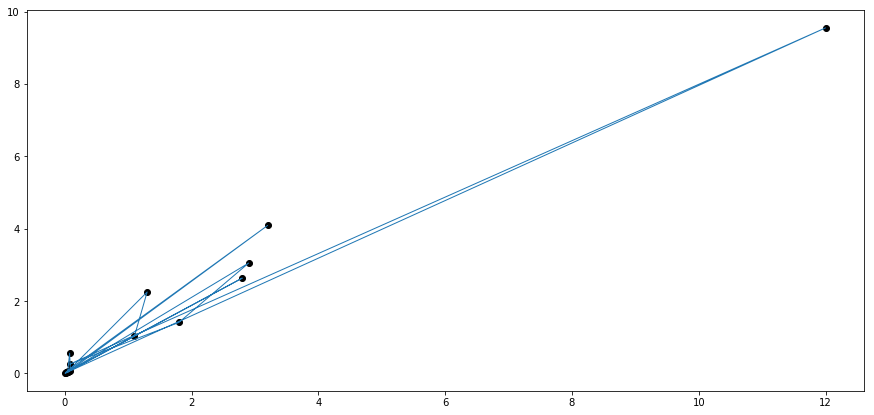

In [117]:
# create a figure
plt.figure(figsize=(15,7))

# plot it
plt.scatter(x=y_val[:20]/1000000, y=y_hat[:20]/1000000, c='k')
plt.plot(y_val[:20]/1000000, y_hat[:20]/1000000, linewidth=1);
